<a href="https://colab.research.google.com/github/brunacataldo/engenharia-de-dados/blob/master/Maternidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUÇÃO
Neste exercício, criamos um database dentro de uma instância SQL no console da Google simulando um banco de dados de uma maternidade e trabalhamos em cima das relações entre tabelas.


GCP > SQL > CREATE INSTANCE > MYSQL > CHOOSE MYSQL

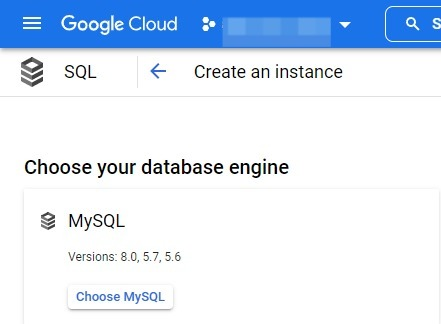

### CONFIG INSTANCIA 

OBS: adicionar senha (da sua preferência ou gerar pelo console)

OBS2: Se estiver usando para fins de aprendizado somente, EM Customize your instance > Data Protection desmarque a opção Enable deletion protection para evitar cobranças indesejadas por não conseguir deletar a instância.

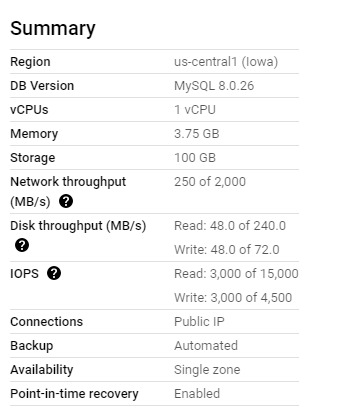

ESPERAR CRIAR > OPEN CLOUD SHELL > SENHA

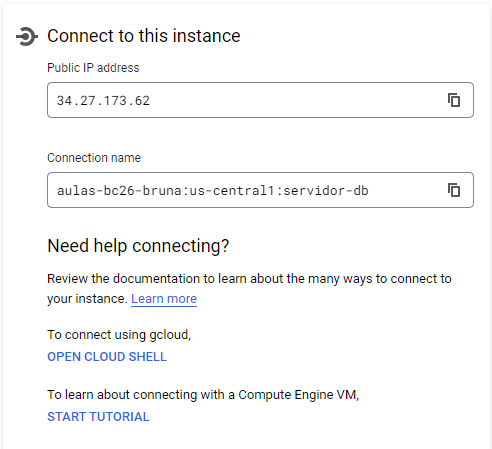

# REFERÊNCIAS EXTERNAS

## Comandos SQL

[Saiba tudo sobre SQL - Alura](https://www.alura.com.br/artigos/o-que-e-sql?gclid=Cj0KCQiA7bucBhCeARIsAIOwr-9Mp3CqHgUlqk81Tk5V1ldMr3H9mSyWfmAcPNWyfJWECf4JdS4LLOYaApCWEALw_wcB)

## Anotações
[Meu caderno de apoio SQL - Notion](https://neon-shrew-4f1.notion.site/SQL-e64a9e066c224a7ab0f52b3662e78098)

#CRIANDO DATABASE

`CREATE DATABASE hospital;`

`USE HOSPITAL;`

## CRIANDO TABELAS

TABELAS: MAE, MEDICO, MEDICO_CELULAR, BEBES

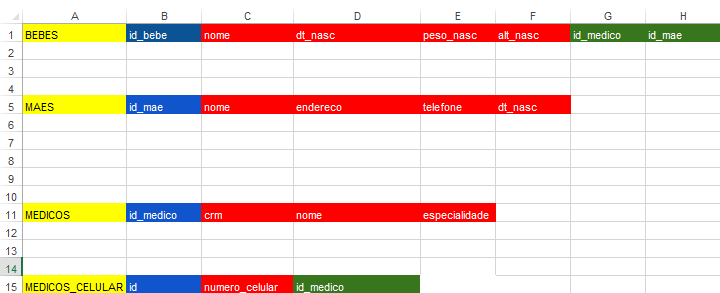


### Criando tabela maes

    CREATE TABLE maes ( 
    id_mae INT AUTO_INCREMENT,
    nome VARCHAR(200) NOT NULL,
    endereco VARCHAR(200),
    telefone VARCHAR(20),
    dt_nasc DATE NOT NULL,
    CONSTRAINT pk_idMae PRIMARY KEY (id_mae)
    );



### Criando tabela médicos

    CREATE TABLE medicos (
    id_medico INT AUTO_INCREMENT,
    crm VARCHAR(20) NOT NULL,
    nome VARCHAR(100) NOT NULL,
    especialidade VARCHAR(100) NOT NULL, 
    CONSTRAINT pk_id_medico PRIMARY KEY(id_medico)
    );

### Criando tabela medicos_celular


    CREATE TABLE medicos_celular ( 
    id INT AUTO_INCREMENT,
    numero_celular VARCHAR(20) NOT NULL, 
    id_medico INT,
    CONSTRAINT pk_id_medicos_celular PRIMARY KEY(id),
    CONSTRAINT fk_medicos_celular FOREIGN KEY(id_medico) REFERENCES medicos(id_medico) 
    );

### Criando tabela bebes
    
    CREATE TABLE bebes (
    id_bebe INT AUTO_INCREMENT PRIMARY KEY,
    nome VARCHAR(200) NOT NULL,
    dt_nasc DATE NOT NULL,
    peso_nasc FLOAT,
    alt_nasc FLOAT,
    fk_id_mae INT,
    fk_id_medico INT,
    CONSTRAINT fk_idMae_bebe FOREIGN KEY (fk_id_mae) 
    REFERENCES maes(id_mae),
    CONSTRAINT fk_idMedico_bebe FOREIGN KEY (fk_id_medico) 
    REFERENCES medicos(id_medico)
    );


### INSERINDO VALORES NAS COLUNAS

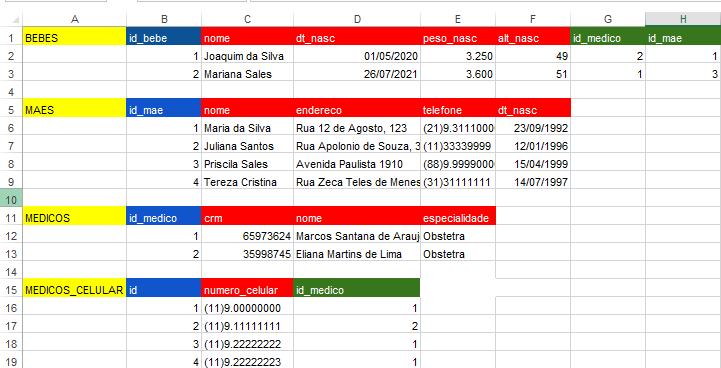

    INSERT INTO medicos VALUES (NULL, '65973624', 'Marcos Santana de Araujo', 'Obstetra'), (NULL, '35998745', 'Eliana Martins de Lima', 'Obstetra');

    INSERT INTO maes VALUES (NULL, 'Juliana Santos', 'Rua Apolonio de Souza, 33', '(11)33339999', '1996-01-12'),
    (NULL, 'Priscila Sales', 'Avenida Paulista 1910', '(88)9.99990000', '1999-04-15'),
    (NULL, 'Tereza Cristina', 'Rua Zeca Teles de Meneses, 33', '(31)31111111', '1997-07-14');

    INSERT INTO medicos_celular VALUES (NULL, '(11)9.00000000', 1),
    (NULL, '(11)9.11111111', 2),
    (NULL, '(11)9.22222222', 1),
    (NULL, '(11)9.22222223', 1);

    INSERT INTO bebes VALUES (NULL, 'Joaquim da Silva', '2020-05-01', 3.250, 49, 2, 1),
    (NULL, 'Mariana Sales', '2021-07-26', 3.600, 51, 1, 2);

#CONSULTAS



### 1) Mostrar todos os bebês que nasceram com mais de 50 cm *

    SELECT * FROM bebes 
    WHERE alt_nasc > 50;

### 2) Mostrar nome e telefone de todas as mães

    SELECT nome, telefone FROM maes;

### 3) Mostrar todos os médicos em que a especialidade é Obstetra

    SELECT * FROM medicos 
    WHERE especialidade = 'Obstetra';


### 4) Mostrar todas as mães que nasceram nos anos de 1996 e 1997

    SELECT * FROM maes 
    WHERE YEAR(dt_nasc) BETWEEN 1996 AND 1997;

OU

    SELECT * FROM maes 
    WHERE dt_nasc BETWEEN '1996-01-01' AND '1997-12-31';

 ### 5) Mostrar todos os bebês que possuam menos de 3,300kg

    SELECT * FROM bebes
    WHERE peso_nasc < 3.3;

### 6) Mostrar o nome, crm e número de celular da Médica Eliana Martins de Lima

    SELECT medicos.nome, medicos.crm, medicos_celular.telefone 
    FROM medicos INNER JOIN medicos_celular
    ON medicos.id_medico = medicos_celular.fk_id_medico
    WHERE medicos.nome = 'Eliana Martins de Lima';

OU 

    SELECT medicos.nome, medicos.crm, medicos_celular.telefone 
    FROM medicos INNER JOIN medicos_celular
    ON medicos.id_medico = medicos_celular.fk_id_medico
    WHERE medicos.id_medico = 2;

### 7) Mostrar o nome do bebê, nome da mãe do bebê e o nome do médico que fez o parto

    SELECT b.nome AS nome_bebe, ma.nome AS nome_mae, m.nome AS nome_medico
    FROM bebes AS b
    INNER JOIN maes AS ma
    ON b.id_mae = ma.id_mae
    INNER JOIN medicos as m
    ON b.id_medico = m.id_medico;